In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [35]:
# Define constants
# Boltzmann constant in J/K
kb = 1.38064852e-23 
# Planck's constant in J*s
h = 6.62607004e-34
# Avogadro's number
NA = 6.0221409e23 
# Speed of light in m/s
c = 299792458
# hbar in J*s
twopi = 2*np.pi
hbar = h/twopi

**Problem 1c**
Calculate the ratio of translational partition functions for this reaction. Your
answer will be in units of volume, and should be multiplied by the concentration
of the standard state (1 M / L = 6.022×10 26 m–3
). Next, calculate the ratio of
rotational, vibrational, and electronic partition functions. Take the product of the
four ratios to obtain the equilibrium constant.

In [38]:
def f_trans(mass, T):
    """
    Calculate the translational partition function for a single molecule, 
    given the mass and temperature.
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    mass : float
        Mass of the molecule in amu. 
        
    Returns
    -------
    float or np.array
        Value of the translational partition function at temperature(s) specified. 
    """
    # convert mass from amu to kg
    mass *= 1.6605e-27
    # calculate inverse thermal wavelength
    thermal_wavelength = np.sqrt(twopi*mass*kb*T)/h
    # calculate f_translational in units of volume
    f_trans_vol = thermal_wavelength**3
    # convert to units of concentration
    f_trans_conc = f_trans_vol * 6.022e26
    return f_trans_conc

In [50]:
m_NH3 = 17.031
m_H2 = 2.016
m_N2 = 28.014
temps = np.arange(800, 1200, 50)
K_trans_rxn = f_trans(m_NH3, temps)/((f_trans(m_N2, temps)**0.5)*(f_trans(m_H2, temps)**1.5))

In [43]:
def f_rot_linear(sigma, B, temp):
    """
    Calculate the rotational partition function for a linear single molecule, 
    given the symmetry number, rotational constant, and temperature.
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    sigma : int
        Symmetry number (how many ways the molecule can be oriented in an indistinguishable way).
    
    B : float
        Rotational constant in wavenumber (inverse centimeters)
        
    Returns
    -------
    float or np.array
        Value of the rotational partition function at temperature(s) specified.
    """
    # convert B from 1/cm to kJ/mol
    B_kj_mol = (B * 100 * c * h * NA)/1000
    # convert kbT from J to kJ/mol
    kbT = kb*temp # In Joules
    kbT *= NA / 1000 # In kJ/mol
    f_rot = kbT/(sigma * B_kj_mol)
    return f_rot

In [44]:
temps = np.arange(800, 1200, 50)
B_N2 = 1.998241 #cm-1
B_H2 = 60.853 #cm-1
f_rot_N2 = f_rot_linear(2, B_N2, temps)
f_rot_H2 = f_rot_linear(2, B_H2, temps)

In [46]:
def f_rot_nonlinear(sigma, A, B, C, temp):
    """
    Calculate the rotational partition function for a linear single molecule, 
    given the symmetry number, rotational constant, and temperature.
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    sigma : int
        Symmetry number (how many ways the molecule can be oriented in an indistinguishable way).
    
    A,B, C : float
        Rotational constants in wavenumber (inverse centimeters)
        
    Returns
    -------
    float or np.array
        Value of the rotational partition function at temperature(s) specified.
    """
    # convert ABB from 1/cm to kJ/mol
    A_kj_mol = (A * 100 * c * h * NA)/1000
    B_kj_mol = (B * 100 * c * h * NA)/1000
    C_kj_mol = (C * 100 * c * h * NA)/1000
    # convert kbT from J to kJ/mol
    kbT = kb*temp # In Joules
    kbT *= NA / 1000 # In kJ/mol
    # calculate f_rot
    term1 = np.sqrt(np.pi)/sigma
    term2 = np.sqrt((kbT**3)/(A_kj_mol*B_kj_mol*C_kj_mol))
    f_rot = term1 * term2
    return f_rot

In [49]:
A = 9.44430 #cm-1
B = 9.44430
C = 6.19600 #cm-1
temps = np.arange(800, 1200, 50)
f_rot_NH3 = f_rot_nonlinear(6, A, B, C, temps)

In [51]:
K_rot_rxn = f_rot_NH3/((f_rot_N2**0.5)*(f_rot_H2**1.5))
K_rot_rxn

array([1.4303981 , 1.38768999, 1.34859226, 1.31262332, 1.27938696,
       1.24855382, 1.2198476 , 1.19303449])

In [52]:
def f_vib(temp, wavn):
    """
    Calculate the vibrational partition function for a single molecule, given the oscillator
    frequency and temperature(s).
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    wavn : float
        Oscillator frequency in wavenumber-inverse cm
        
    Returns
    -------
    float or np.array
        Value of the vibrational partition function at temperature(s) specified
    """
    # Calculate frequency in Hz
    freq = wavn * 100 * c
    # Energy spacing in J
    hv = h*freq
    # Vibrational temperature in K
    vibTemp = hv/kb
    return np.exp(-vibTemp/(2*temp)) / (1.0 - np.exp(-vibTemp/temp))

In [53]:
vibZ_H2 = f_vib(temps, 4401.21)
vibZ_N2 = f_vib(temps, 2358.57)
vibZ_NH3_mode1 = f_vib(temps, 3337)
vibZ_NH3_mode2 = f_vib(temps, 950)
vibZ_NH3_mode3 = f_vib(temps, 3444)
vibZ_NH3_mode4 = f_vib(temps, 1627)
vibZ_total_NH3 = vibZ_NH3_mode1*vibZ_NH3_mode2*vibZ_NH3_mode3*vibZ_NH3_mode4
K_vib_rxn = vibZ_total_NH3/((vibZ_H2**1.5)*(vibZ_N2**0.5))

array([0.31150179, 0.35027922, 0.39053058, 0.4322655 , 0.47550107,
       0.5202589 , 0.56656313, 0.61443897])

In [56]:
def f_elec(D_e, temp):
    """
    Calculate the vibrational partition function for a single molecule, given the oscillator
    frequency and temperature(s).
    
    Parameters
    ----------
    temp : float or np.array
        Temperature(s) in K
    
    D_e: float
        Dissociation energy in kJ/mol
        
    Returns
    -------
    
    float or np.array
        Value of the electronic partition function at the temperature(s) specified.
    """
    # convert kbT to kJ/mol
    kbT = kb*temp # In Joules
    kbT *= NA / 1000 # In kJ/mol
    # calculate f_elec
    f_elec = np.exp(D_e/kbT)
    return f_elec

In [57]:
D_e_H2 = -456.75
D_e_N2 = -944.46
D_e_NH3 = -1243.44
temps = np.arange(800, 1200, 50)
f_elec_H2 = f_elec(D_e_H2, temps)
f_elec_N2 = f_elec(D_e_N2, temps)
f_elec_NH3 = f_elec(D_e_NH3, temps)
K_elec_rxn = f_elec_NH3/((f_elec_N2**0.5)*(f_elec_H2**1.5))
K_elec_rxn

array([2.39515813e-06, 5.12816030e-06, 1.00891044e-05, 1.84845014e-05,
       3.18762595e-05, 5.21900791e-05, 8.17039491e-05, 1.23018835e-04])

In [59]:
K_eq = K_elec_rxn * K_vib_rxn * K_rot_rxn * K_trans_rxn

array([4.96725401e-64, 1.05935060e-63, 2.07264177e-63, 3.77235638e-63,
       6.45833332e-63, 1.04937444e-62, 1.63007504e-62, 2.43532143e-62])

**Problem 1d**

In [63]:
Keq_log = np.log10(K_eq)
Keq_log

array([-63.30388363, -62.97496029, -62.68347575, -62.42338729,
       -62.18987954, -61.97906952, -61.7877924 , -61.61344371])

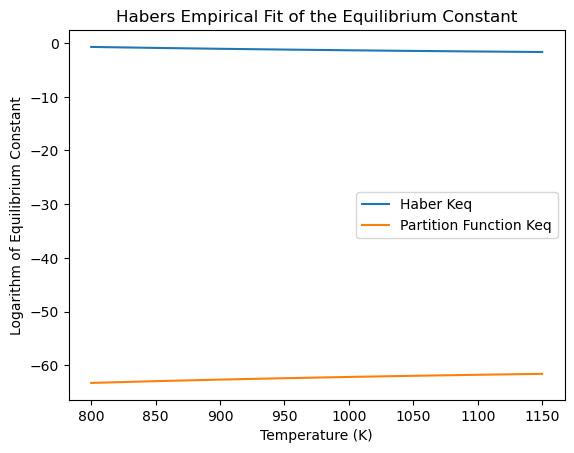

In [66]:
Keq_log_haber = (2.1+(2098/temps) - 2.5088*np.log10(temps) - 1.066e-4*temps +1.86e-7 * temps**2)+ np.log10(0.0821*temps)

fig, ax = plt.subplots()
ax.plot(temps, Keq_log_haber, label= 'Haber Keq')
ax.plot(temps, Keq_log, label= 'Partition Function Keq')
ax.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Logarithm of Equilibrium Constant')
plt.title('Habers Empirical Fit of the Equilibrium Constant')
plt.show()

# plt.plot(temps, Keq_log)
# plt.xlabel('Temperature (K)')
# plt.ylabel('Logarithm of Equilibrium Constant')
# plt.title('Habers Empirical Fit of the Equilibrium Constant')
# plt.show()

**Problem 1e** My Keq is very wrong, but possible reasons that the partition function calculated equilibrium constants are not the same as Haber's empirical fit are that the vibrations are modeled as a harmonic oscillator which is not a perfect model for bond vibrations and also the energies for the electronic partition function were calculated using approximations so they are not exact even though the level of theory was very good. 

**Problem 2a**

In [3]:
from openmm.app import *
from openmm import *
from openmm.unit import *

In [9]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3p.xml')
system = ff.createSystem(pdb.topology, 
                         nonbondedMethod=PME, 
                         nonbondedCutoff=0.9*nanometer, rigidWater=True) #creates interactions
integ = LangevinIntegrator(300*kelvin, 1.0/picosecond, 2*femtosecond) #give integrator timestep*unit variable
baro = MonteCarloBarostat(1.0*atmosphere, 300*kelvin) #pressure, temp, attempt freq
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,
                  density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-30910.802515468473	264.2928674432924	0.999577221289633	0
4.0%	2000	-29852.00387067077	285.4124014077691	0.988966742443271	31.9
6.0%	3000	-28945.31419803429	305.0759672324044	0.9916418029819717	31.5
8.0%	4000	-28781.136653738562	300.7613182541737	0.9856892458714817	31.3
10.0%	5000	-28875.080719471356	307.4663630081706	0.9894102556638885	29.9
12.0%	6000	-28753.561554924934	296.78720095281443	0.9711788069145373	29.5
14.0%	7000	-28452.650836389308	306.0136438544146	0.9680162431947041	29.1
16.0%	8000	-28668.612590686564	302.57810447042476	0.9894691679703834	28.9
18.0%	9000	-28401.68223344686	311.9767717520791	0.9777378172101545	28.6
20.0%	10000	-28970.113875113893	296.4063516461604	0.9670532622745127	28.4
22.0%	11000	-29029.18692234537	297.5028025548226	0.9913266786202483	28.3
24.0%	12000	-29137.82598227804	304.8542283912594	0.9874876974152191	28
26.0%	13000	-29093.772853999486	293

**Problem 2b**

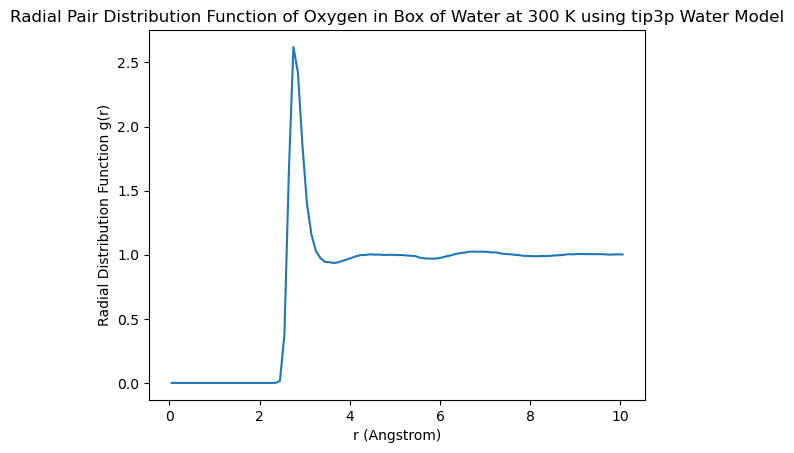

In [27]:
data = np.loadtxt('rdf_graph_300K_tip3p.dat')
x = data[:,0]
y = data[:,1]
integral = data[:,2]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('Radial Pair Distribution Function of Oxygen in Box of Water at 300 K using tip3p Water Model')
plt.show()

**Problem 2c**

Radial distribution function of water at 370K with tip3p parameters. It looks like the convergence is more smooth at 370 K than it is at 300 K. 

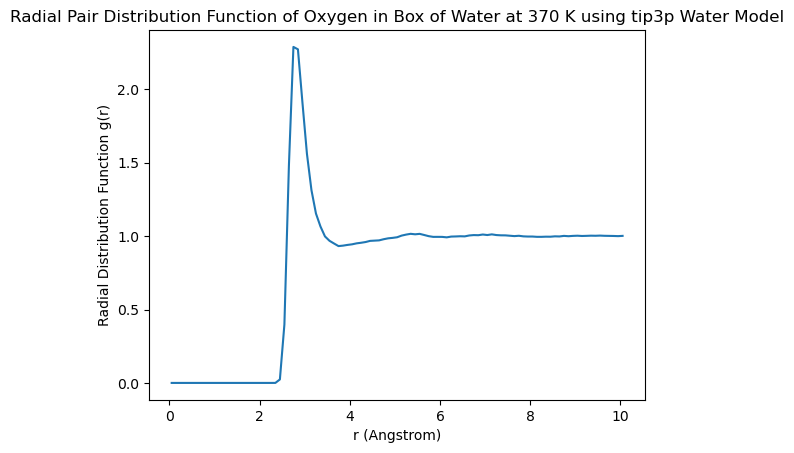

In [28]:
data = np.loadtxt('rdf_graph_370K_tip3p.dat')
x = data[:,0]
y = data[:,1]
integral = data[:,2]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('Radial Pair Distribution Function of Oxygen in Box of Water at 370 K using tip3p Water Model')
plt.show()

In [3]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3p.xml')
system = ff.createSystem(pdb.topology, 
                         nonbondedMethod=PME, 
                         nonbondedCutoff=0.9*nanometer, rigidWater=True) #creates interactions
integ = LangevinIntegrator(370*kelvin, 1.0/picosecond, 2*femtosecond) #give integrator timestep*unit variable
baro = MonteCarloBarostat(1.0*atmosphere, 370*kelvin) #pressure, temp, attempt freq
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics-370.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,
                  density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-27507.329840921768	329.18180381520557	0.9712034345319386	0
4.0%	2000	-25148.25822807738	360.57425333464386	0.9433449548249666	31.9
6.0%	3000	-24289.772143987007	366.7238786940293	0.9046596295932012	32
8.0%	4000	-23769.448821098747	376.6034459835521	0.9159012455434189	31.9
10.0%	5000	-23568.803294806596	379.6372492735878	0.9093891240132866	31.2
12.0%	6000	-23604.519084700354	372.26307154820904	0.8980534148320951	30.9
14.0%	7000	-23852.158348783443	371.84947992744287	0.9099812466953662	30.7
16.0%	8000	-23734.601162124527	367.09600060257924	0.8965845114348177	30.5
18.0%	9000	-23990.664549025358	372.34318388714297	0.8959140470509028	30.2
20.0%	10000	-24206.794524502475	375.5434880799112	0.8981942722490708	30
22.0%	11000	-24034.655294275522	369.4941283593024	0.9059249089511362	29.8
24.0%	12000	-23952.340709531592	387.42645582795535	0.9003376019850128	29.7
26.0%	13000	-23964.0519222

**Problem 2d**
The experimentally measured O-O radial distribution function at 300 K is 
provided as oo.als_bestfit.dat .  Plot your RDF result from part (a), compare to 
the experimental result, and note the differences.

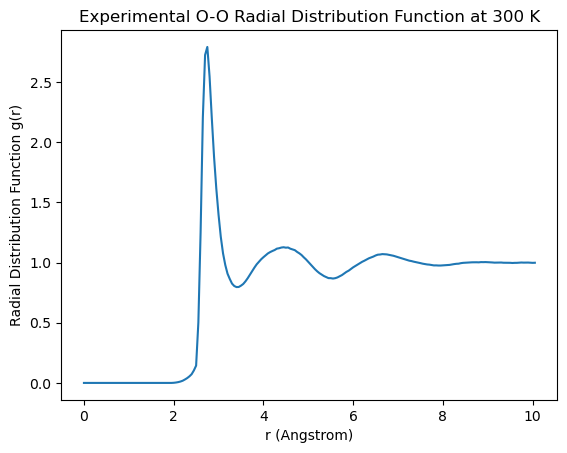

In [30]:
data = np.loadtxt('oo.als_bestfit.dat')
x = data[:,0]
y = data[:,1]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('Experimental O-O Radial Distribution Function at 300 K')
plt.show()

**Problem 2e**

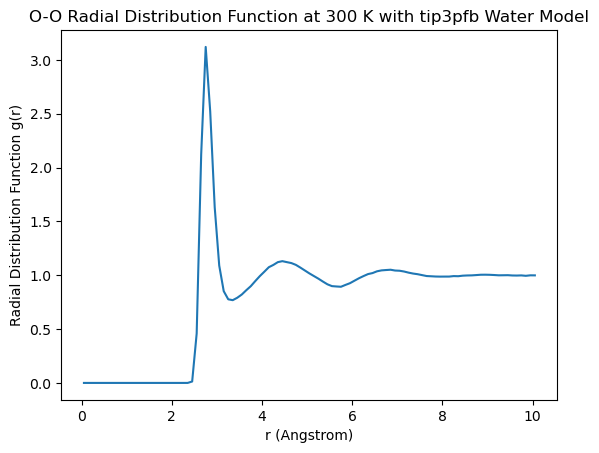

In [31]:
data = np.loadtxt('rdf_graph_300K_tip3pfb.dat')
x = data[:,0]
y = data[:,1]
plt.plot(x,y)
plt.xlabel('r (Angstrom)')
plt.ylabel('Radial Distribution Function g(r)')
plt.title('O-O Radial Distribution Function at 300 K with tip3pfb Water Model')
plt.show()

In [4]:
pdb = PDBFile('waterbox.pdb')
ff = ForceField('tip3pfb.xml')
system = ff.createSystem(pdb.topology, 
                         nonbondedMethod=PME, 
                         nonbondedCutoff=0.9*nanometer, rigidWater=True) #creates interactions
integ = LangevinIntegrator(300*kelvin, 1.0/picosecond, 2*femtosecond) #give integrator timestep*unit variable
baro = MonteCarloBarostat(1.0*atmosphere, 300*kelvin) #pressure, temp, attempt freq
system.addForce(baro)
simul = Simulation(pdb.topology, system, integ)
simul.context.setPositions(pdb.positions)
simul.context.getState(getEnergy=True).getPotentialEnergy()
simul.reporters.append(DCDReporter('waterbox-dynamics-300-tip3pfb.dcd', 100))
import sys
simul.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, totalEnergy=True, temperature=True,
                  density=True, progress=True, speed=True, separator='\t', totalSteps=50000))
simul.step(50000)

#"Progress (%)"	"Step"	"Total Energy (kJ/mole)"	"Temperature (K)"	"Density (g/mL)"	"Speed (ns/day)"
2.0%	1000	-38169.60678316408	280.62190314691213	1.0106812457760632	0
4.0%	2000	-37603.25626211372	302.72627291187655	1.0103228711103676	33.3
6.0%	3000	-37681.75607029509	293.4104268628111	0.9999290466741434	32.2
8.0%	4000	-37327.74998980909	300.2334954185119	0.9990276118651219	31.5
10.0%	5000	-37074.83944025621	303.7980848313222	0.9775047501454824	31.1
12.0%	6000	-37307.11199062341	294.22030406305174	0.9928435639203831	30.5
14.0%	7000	-36950.1439222795	309.9758698805656	0.9920553106376377	29.9
16.0%	8000	-37552.376572383546	297.72513754938876	0.994040287231047	29.4
18.0%	9000	-37392.81083628512	301.2106623852431	0.9954593970822627	29.1
20.0%	10000	-37309.887014571694	295.7282256222367	0.9979066961874917	28.9
22.0%	11000	-37375.381507561106	301.5137642298764	1.0048846457151048	28.6
24.0%	12000	-37444.549426855694	288.6060289474853	1.0040749152242916	28.6
26.0%	13000	-37126.11238865639	300

**Problem 2f**

Save the TIP3P-FB RDF to a file, and numerically integrate the function 
$ {4}{\pi}{r^2}{g(r)}{dr} $ out to the first trough to estimate the coordination number. You can 
do this easily by checking the “Display Int(g(r))” box, and noting the Int(g(r)) 
value that appears at the same r-coordinate as the first trough in g(r). 

<img src="waterbox-rdf-tip3pfb-300K.png" alt="Radial Pair Distribution Function of Oxygen in Water at 300 K with tip3pfb parameters" width="500"/>

<img src="waterbox-integral-tip3pfb-300K.png" alt="Integral of Radial Pair Distribution Function of Oxygen in Water at 300 K with tip3pfb parameters" width="500"/>